In [1]:
from basilisk import Node, BN

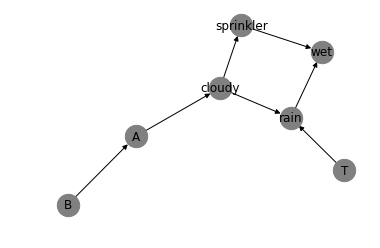

In [2]:
# define nodes/edges for a somewhat complicated network

B = Node("B")
A = Node("A", [B])
C = Node("cloudy", [A])
T = Node("T")
R = Node("rain", [C, T])  # each node knows its parent
S = Node("sprinkler", [C])
W = Node("wet", [R, S])

ls_n = [B, A, C, T, R, W, S]
model = BN(ls_n)
model.show(node_size=500, node_color='gray')

In [3]:
topological_sequence = model.sample(W)

evaluating wet
fifo:  ['sprinkler', 'rain']
lifo ['wet', 'rain', 'sprinkler']
----------------------------------------
evaluating rain
fifo:  ['T', 'cloudy', 'sprinkler']
lifo ['wet', 'rain', 'sprinkler', 'cloudy', 'T']
----------------------------------------
evaluating sprinkler
fifo:  ['T', 'cloudy']
lifo ['wet', 'rain', 'sprinkler', 'cloudy', 'T']
----------------------------------------
evaluating cloudy
fifo:  ['A', 'T']
lifo ['wet', 'rain', 'sprinkler', 'cloudy', 'T', 'A']
----------------------------------------
evaluating T
fifo:  ['A']
lifo ['wet', 'rain', 'sprinkler', 'cloudy', 'T', 'A']
----------------------------------------
evaluating A
fifo:  ['B']
lifo ['wet', 'rain', 'sprinkler', 'cloudy', 'T', 'A', 'B']
----------------------------------------
evaluating B
fifo:  []
lifo ['wet', 'rain', 'sprinkler', 'cloudy', 'T', 'A', 'B']
----------------------------------------


In [5]:
for node in topological_sequence:
    print(node.name)

wet
rain
sprinkler
cloudy
T
A
B
